In [48]:
# Build a schedule-based simulation of an M/D/1 queue

# Classes needed:

# Queue - This class tracks the number of people in the queue and the number of people being served.
# It also schedules when a customer starts being served and stops being served (leaves the grocery store).

# GroceryStore - This class contains the queues (in this case only one but you’ll need to make more than one for your project).
# It also schedules the arrival of customers at the queue(s).

class Queue:
    
    def __init__(self, service_rate):
        self.people = 0
        self.service_rate = service_rate
        
    def customerarrives(self):
        self.people = self.people + 1
    
    def customerbeingserved(self):
        self.people = self.people - 1

class GroceryStore:
    
    def __init__(self, queue, arrival_rate):
        self.queue = queue
        self.arrival_rate = arrival_rate
    
    def arrival_time(self):
        arrival_distribution = sts.expon(scale=1/self.arrival_rate)
        next_arrival_time = arrival_distribution.rvs()
        return next_arrival_time

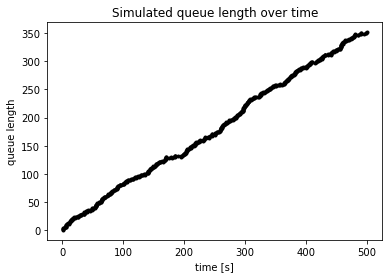

In [53]:
def run_simulation(arrival_rate, service_rate, run_until):
    
    queue = Queue(service_rate = service_rate)
    store = GroceryStore(queue = queue, arrival_rate = arrival_rate)

    next_arrival_time = store.arrival_time()
    
    next_departure_time = np.inf  

    plot_data = {
        'time': [],
        'people_in_queue': []}
    
    while min(next_arrival_time, next_departure_time) < run_until:
        
        if next_arrival_time < next_departure_time:
            plot_data['time'].append(next_arrival_time)
            store.queue.customerarrives()
            if store.queue.people == 1:
                assert next_departure_time == np.inf
                next_departure_time = (
                    next_arrival_time + store.queue.service_rate)
            next_arrival_time += store.arrival_time()
            
        else:
            plot_data['time'].append(next_departure_time)
            store.queue.customerbeingserved()
            if store.queue.people == 0:
                next_departure_time = np.inf
            else:
                next_departure_time += store.queue.service_rate
        assert store.queue.people >= 0
        plot_data['people_in_queue'].append(store.queue.people)
        
    plt.figure()
    plt.title('Simulated queue length over time')
    plt.plot(plot_data['time'], plot_data['people_in_queue'], 'k.')
    plt.xlabel('time [s]')
    plt.ylabel('queue length')
    plt.show()
    
arrival_rate = 1
service_rate = 5
run_until = 500

run_simulation(arrival_rate, service_rate, run_until)

#### Firstly, I adapted the code suggested and cannot see how to better adjust it so it would not be without "schedule". It makes sense that I can manipulate the attributes of the instances, but I am unsure whether it makes sense to make next arrival/departure time an attribute, given how many changes are happening between them. Will appreciate clarification on that.
#### Additionally - my code bugged just a minute before the class, as I was double-checking the variable names and did not save the piece of code in advance, so I apologize for not having time to resolve this.

#### For #CodeReadibility - I ensured that my code was simple, with variables readable, names assigned being straitghforward, and without unneccessary lengthy explanations.
#### For #PyhtonImplementation - I carefulle wrote my part of the code, adapting the part provided as the task requested, and ensured that the algorithm was working well, besides a minor bag with a queue length increase.